#Introduction to Regression with Neural Network in Tensorflow
 There are many definition for regression problem but in our case , we'are going to Simplify it : predicting a numerical variable based on some other combination of variables, even shorter ... predicting a number
 

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to veiw and fit

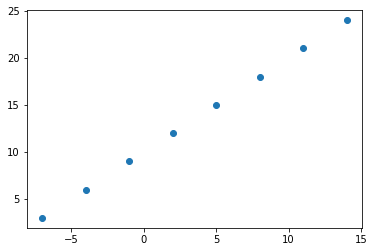

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

#Create labels
y = np.array([3.0,6.0, 9.0, 12.0, 15.0, 18.0, 21.0,24.0])

# Visualize it 
plt.scatter(X,y)

In [3]:
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for the housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape 
output_shape = y[0].shape 
input_shape, output_shape

((), ())

In [8]:
input_shape = X.shape 
output_shape = y.shape 
input_shape, output_shape

((8,), (8,))

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(-7.0, 3.0)

In [11]:
# Turn our Numpy arrays into tensors with dtype float 32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
input_shape = X[0].shape 
output_shape = y[0].shape 
input_shape, output_shape

(TensorShape([]), TensorShape([]))

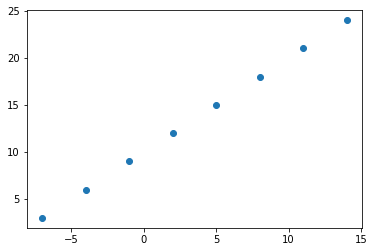

In [13]:
plt.scatter(X,y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function ( in other words, the function which tells our model how wrong it is ) and the optimizer (tells our model how to imporve the patterns its learning ) and evaluation metrics (what we can use to interprete the performance of our model )
3. Fitting a model - letting the model try to find patterns between X & y ( features and labels )

In [14]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# model =tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
 # mae is short for mean absolute error
 # SGD is short for stochastic gradient descent
model.compile(loss=tf.keras.losses.mae,optimizer = tf.keras.optimizers.SGD(),metrics=["mae"])

# 3. Fit the model
model.fit(X,y,epochs = 15 )

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/15
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/15
1/1 [==============================] - 0s 12ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/15
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/15
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/15
1/1 [==============================] - 0s 9ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/15
1/1 [==============================] - 0s 8ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/15
1/1 [==============================] - 0s 9ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/15
1/1 [==============================] - 0s 7ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/15
1/1 [==============================] - 0s 14ms/step - lo

In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Let try and make a prediction using model
y_pred = model.predict([17.0])
y_pred

array([[18.766022]], dtype=float32)

In [17]:
y_pred + 11

array([[29.766022]], dtype=float32)

## Improving our Model

We can improve our model, by altering the steps we took to create a model

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optizimation function .
3. **Fitting a model** - here we might fit a model for more  **epochs** ( to leave it trainning for longer) or on more date ( to give the model more examples to learn from )

In [18]:
 # Let's rebuild our model

 #1. Create the model
 model = tf.keras.Sequential([
                              tf.keras.layers.Dense(1)
 ])

 # 2. Compile the model
 model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
 # 3. Fit the model
 model.fit(X,y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 280ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s

In [19]:
# Remind ourself of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [20]:
# Let's see if our model's prediction has improved..
model.predict([17.0])

array([[29.739855]], dtype=float32)

##Improving 2

In [21]:
 # Let's rebuild our model

 #1. Create the model
 model = tf.keras.Sequential([
                              # tf.keras.layers.Dense(50, activation=None),
                              tf.keras.layers.Dense(100, activation="relu"),
                              tf.keras.layers.Dense(100, activation="relu"),
                              tf.keras.layers.Dense(100, activation="relu"),
                              tf.keras.layers.Dense(1),
 ])

 # 2. Compile the model
 model.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
               metrics=["mae"])
 # 3. Fit the model
 model.fit(X,y, epochs=200)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
1/1 [==============================] - 1s 528ms/step - loss: 12.9513 - mae: 12.9513
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 12.5285 - mae: 12.5285
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 12.1098 - mae: 12.1098
Epoch 4/200
1/1 [==============================] - 0s 6ms/step - loss: 11.6979 - mae: 11.6979
Epoch 5/200
1/1 [==============================] - 0s 7ms/step - loss: 11.2893 - mae: 11.2893
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 10.8901 - mae: 10.8901
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 10.5068 - mae: 10.5068
Epoch 8/200
1/1 [==============================] - 0s 12ms/step - loss: 10.1209 - mae: 10.1209
Epoch 9/200
1/1 [==============================] - 0s 10ms/step - loss: 9.7311 - mae: 9.7311
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 9.3167 - mae: 9.3167
Epoch 11/200
1/1 [==============================] - 0s 6ms

In [22]:
# Remind ourself of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [23]:
# Let's see if our model's prediction has improved..
model.predict([17.0])

array([[27.808186]], dtype=float32)

## Evaluating a model
In practice , a typical workflow we'll go through when building neural networks is :
```
Build a model -> fit if -> evaluate it ->  tweak a model -> fit it -> evaluate it -> tweak a mode -> fit it -> evaluate it....
```

When it comes to evaluation ... there are 3 words we should memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize :
* The data - what data are we working with ? what does it looks like?
* The mode itself - what does our model looks like ?
* The trainning of a model - how does a model perform while it learns?
* The predictions of the model  - how do the predictions of a model line up against the ground truth ( Original Dataset)

In [24]:
# Let Make a bigger dataset)
X= tf.range(-100, 100, 4)
X 

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

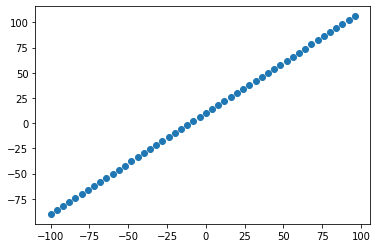

In [26]:
 # Visualize the data
 import matplotlib.pyplot as plt 
#  plt.plot(X,y)
 plt.scatter(X,y)

### The 3 sets ...

* **Trainning set -** The mode learns from this data , which is typically 70-80%  of the total data you have available.
* **Validation set -** the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set -** the model gets evaluated on this data to test what it has learned , this set is typically 10-15% of the total data available

In [27]:
# Check the length of how many samples we have 
len(X)

50

In [28]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [29]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

### Visualizing the data
Now we've got our data in trainning and test sets... let's visualize it again!

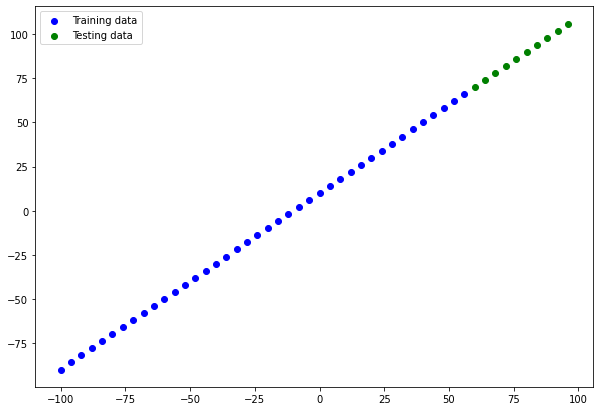

In [30]:
plt.figure(figsize=(10,7))

# Plot trainning data in blue
plt.scatter(X_train, y_train,c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test,y_test, c="g", label="Testing data")
#Show a legend
plt.legend();

In [31]:
# Let's have a look at how to build a neuron network for our data

# 1.  Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae ,
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

              #    tf.keras.layers.Dense(100, activation="relu"),
              #  optimizer=tf.keras.optimizers.Adam(lr=0.001),

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 47.1280 - mae: 47.1280
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 15.7179 - mae: 15.7179
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 15.0809 - mae: 15.0809
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.1832 - mae: 8.1832
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.6664 - mae: 10.6664
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8707 - mae: 9.8707
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.9399 - mae: 8.9399
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0851 - mae: 9.0851
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.6577 - mae: 19.6577
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.6254 - mae: 10.6254
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

### Visualising the model 

In [32]:
# intentionnaly error!
# model.summary() 

In [33]:
# model.build()

# Let's createa a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1.create a mode (same as above)
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10 ,input_shape=[1],name="input_layer"),
                           tf.keras.layers.Dense(10 ,input_shape=[1],name="input_layer2"),
                           tf.keras.layers.Dense(1 ,name="output_layer"),
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),              
              # optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)


 


In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
input_layer2 (Dense)         (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during **transfer learning**

📖 **Resource:** For a more in-depth overviw of the trainable parameters with a layer, check out on google : MIT's introduction to deep learning video ( http://introtodeeplearning.com/ )

🛠 **Exercice:** We can also try playing around with the number of hidden units in the dense layer,see how that effects the number of parameters( total and trainable ) by calling  `model.summary()`


In [35]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=200, verbose =0)

In [36]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
input_layer2 (Dense)         (None, 10)                110       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


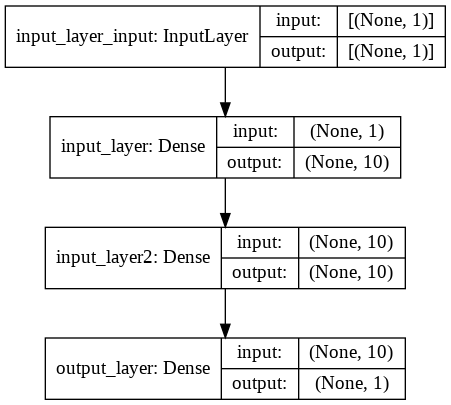

In [37]:
 from tensorflow.keras.utils import plot_model
 plot_model(model= model, show_shapes=True)

### Visualizing our model prediction

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often we'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus our model's predictions).

In [38]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[60.191483],
       [63.933605],
       [67.675735],
       [71.41786 ],
       [75.15998 ],
       [78.902115],
       [82.64424 ],
       [86.38637 ],
       [90.128494],
       [93.87062 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** if we feel like we are going to reuse some kind of functionality in the future , it's good idea to turn it into a function 

In [40]:
#Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred
                     ):
  """
  Plots training data, test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels,c="b", label="Training data")

  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r",label="Predictions")
  #show the legend
  plt.legend();


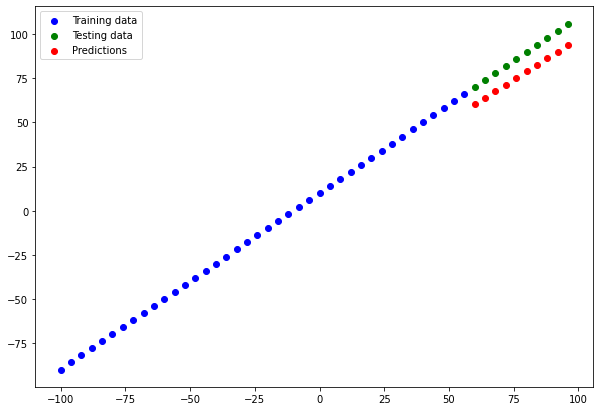

In [41]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics 

Depending on the problem we're working on , there will be different evaution metrics to evaluate our model's performance.
Since we're working on regression , two of the main metrics:
* MAE - mean absolute error, " on average, how wrong is each of our model's predictions"
* MSE - mean square error , " square the average errors" 

In [42]:
# Evaluate the model on the test 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 138ms/step - loss: 10.9690 - mae: 10.9690


[10.968950271606445, 10.968950271606445]

In [43]:
y_pred 

array([[60.191483],
       [63.933605],
       [67.675735],
       [71.41786 ],
       [75.15998 ],
       [78.902115],
       [82.64424 ],
       [86.38637 ],
       [90.128494],
       [93.87062 ]], dtype=float32)

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
# Calculate the mean absolute error
# tf.keras.losses.MAE(y_pred, y_test)
tf.metrics.mean_absolute_error(y_true=y_test,y_pred=tf.constant(y_pred))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([27.808517, 24.066395, 20.324265, 16.865711, 14.104012, 12.039154,
       10.671152, 10.      , 10.025699, 10.774124], dtype=float32)>

In [46]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[60.191483],
       [63.933605],
       [67.675735],
       [71.41786 ],
       [75.15998 ],
       [78.902115],
       [82.64424 ],
       [86.38637 ],
       [90.128494],
       [93.87062 ]], dtype=float32)>

In [47]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([60.191483, 63.933605, 67.675735, 71.41786 , 75.15998 , 78.902115,
       82.64424 , 86.38637 , 90.128494, 93.87062 ], dtype=float32)>

In [48]:
y_pred - y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[-10, -14, -18, -22, -26, -30, -34, -38, -42, -46],
       [ -7, -11, -15, -19, -23, -27, -31, -35, -39, -43],
       [ -3,  -7, -11, -15, -19, -23, -27, -31, -35, -39],
       [  1,  -3,  -7, -11, -15, -19, -23, -27, -31, -35],
       [  5,   1,  -3,  -7, -11, -15, -19, -23, -27, -31],
       [  8,   4,   0,  -4,  -8, -12, -16, -20, -24, -28],
       [ 12,   8,   4,   0,  -4,  -8, -12, -16, -20, -24],
       [ 16,  12,   8,   4,   0,  -4,  -8, -12, -16, -20],
       [ 20,  16,  12,   8,   4,   0,  -4,  -8, -12, -16],
       [ 23,  19,  15,  11,   7,   3,  -1,  -5,  -9, -13]], dtype=int32)>

In [49]:
 # Calculate the mean absolute error
 mae= tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
 mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.96895>

In [50]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse 

<tf.Tensor: shape=(), dtype=float32, numpy=120.86647>

In [51]:
 # Make some functions to reuse MAE and MSE
 def mae(y_true, y_pred):
   return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))
 def mse(y_true, y_pred):
   return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it ->fit it -> evaluate it ... 

```

1. Get more data - get more examples for our model to train on ( more opportunities to learn patterns of relationships between features and labels).
2. Make our model larger (using a more complex model )  - this might come in the form of more layers or mor hidden units in each layer
3. Train for longer - give our model more of a chance to find patterns in the data

Let's do 3 modelling experiments :
1. `model_1` -  Same as the original model, 1 layer , trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [52]:
X_train , y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

 **Build**  ```model_1 ```

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

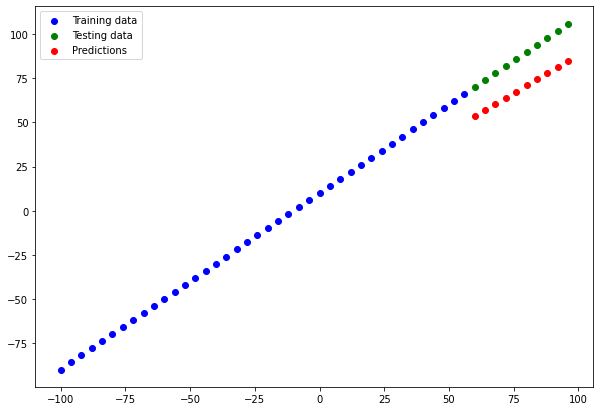

In [54]:
# Make and plot prediction for Model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [55]:
tf.constant(y_pred_1),tf.squeeze(y_pred_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [56]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build `model_2`**
* 2 dense layers, trained for 100 epochs 

In [57]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(X_train,y_train , epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 5ms

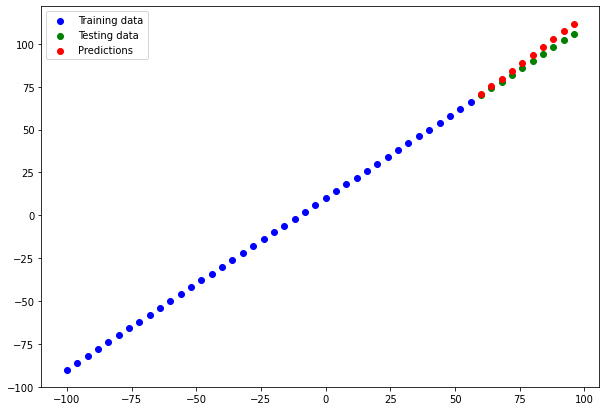

In [58]:
# Make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [59]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.0703>)

***Build `model_3`**

* 2 layers, trained for 500 epochs


In [60]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3= tf.keras.Sequential(
    [
     tf.keras.layers.Dense(10),
     tf.keras.layers.Dense(1)
    ]
)
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model
model_3.fit(X_train,y_train , epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 8ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/500
2/2 [==============================] - 0s 8ms/

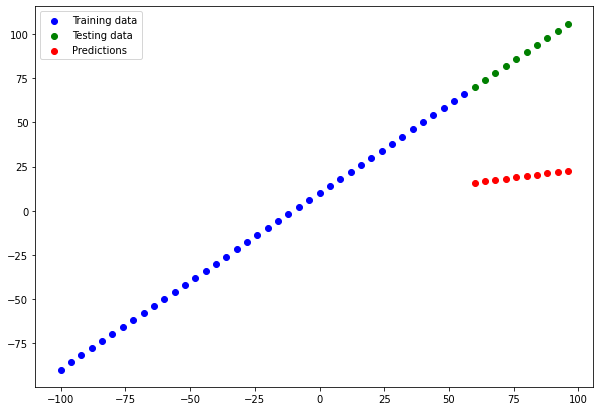

In [61]:
# Make and plot some prediction 
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

plot shows : overfitting 

In [62]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.71362>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0283>)

🔑 **Note:** We want to start with small experiments and make sure they work and then increase their scale when necessary

### Comparing the results of our Experiments

We've run a few experiments, let's compare the results

In [63]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd 

model_results = [
                 ["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
]

all_results = pd.DataFrame(model_results, columns =["model", "mae", "mse"])
all_results 

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.196964,13.070300
2,model_3,68.713623,4808.028320


Looks like `model_2` performed the best..

In [64]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** One of our main goals should be to minimize the time between our Experiments. The more experiments we do , the more things we'll figure out which don't work and in turn , get  closer to figuring out what does work. Let Remember the machine learning practionner's motto: " experiment, experiment, experiment ... "

## Tracking our experiments

One really good habit in machine learning modelling is to track the result of our experiments.
And when doing so, it can be tedious if we're running of experiments.
Luckily , there are tools to help us !
📖 **Resource:** As we build more  models, we'll want to look into using : 
* TensorBoard  - a component of the TensorFlow library to help track modelling experiments ( we'll see this one later ).
* Weights & Biases  - a tool for tracking all of kinds of machine learning experiments ( plugs straight into TensorBoard)


##Saving our Model

Saving our models allows us to use them outiside of Google Colab ( or wherever they were trained )  such as in a web application  or a mobile app.

There are two main formats we can save our model's too :
1. The SavedModel format
2. The HDF5 format 


In [65]:
# Save  model (SavedModel format)
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [66]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

## Loading the Saved Model

In [67]:
# Load in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compare mode_2 predictions with SavedModel format model predictions
model_2_pred = model_2.predict(X_test)
loaded_SavedModel_format_pred= loaded_SavedModel_format.predict(X_test)
model_2_pred == loaded_SavedModel_format_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [70]:
model_2_pred, loaded_SavedModel_format_pred

(array([[ 70.55221 ],
        [ 75.13992 ],
        [ 79.72765 ],
        [ 84.31538 ],
        [ 88.9031  ],
        [ 93.49082 ],
        [ 98.07855 ],
        [102.666275],
        [107.254005],
        [111.84173 ]], dtype=float32), array([[ 70.55221 ],
        [ 75.13992 ],
        [ 79.72765 ],
        [ 84.31538 ],
        [ 88.9031  ],
        [ 93.49082 ],
        [ 98.07855 ],
        [102.666275],
        [107.254005],
        [111.84173 ]], dtype=float32))

In [71]:
# Compare the MAE of model_2 pred and loaded_SavedModel_pred
mae(y_true=y_test, y_pred=model_2_pred) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_pred) 

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [72]:
# Load the model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [73]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [74]:
# Check to see if loaded .h5 model prediction  match model_2's prediction
model_2_pred = model_2.predict(X_test)
loaded_h5_model_pred = loaded_h5_model.predict(X_test)
model_2_pred == loaded_h5_model_pred 

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model(or any other file ) from Google Colab

If we want to download our files from Google Colab

1. We can go to the "files" tab and right click on the file we're after and click "download"
2. Use code (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying it there ( see 2nd code cell below ).

In [75]:
# Download a file from Google Colab
from google.colab import files
# files.download("best_model_HDF5_format.h5")
files.download("/content/model.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
# Save a file from Google Colab to Google Drive ( require mounting Google Drive )
!cp best_model_HDF5_format.h5  drive/MyDrive/Colab_Notebooks/Course/TensorFlowDeveloper 

In [77]:
!ls  /content/drive/MyDrive/Colab_Notebooks/Course/TensorFlowDeveloper 

/content/drive/MyDrive/Colab_Notebooks/Course/TensorFlowDeveloper


## A larger example

In [78]:
# Import required libraries
import tensorflow as tf 
import pandas as pd 
import matplotlib.pyplot as plt


In [79]:
 # Read in the insurance dataset
 insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
 insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [80]:
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [81]:
insurance["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [82]:
#Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot= pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [83]:
# Create X & y values ( features and labels )
X = insurance_one_hot.drop("charges", axis=1)
y= insurance_one_hot["charges"]


In [84]:
#View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [85]:
#View y
y.head()


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [86]:
# Create trainning and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X),len(X_train), len(X_test)


(1338, 1070, 268)

In [87]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
# Build a neural network ( sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae ,
                        optimizer= tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3.Fit the model
insurance_model.fit(X_train, y_train, epochs=100,verbose=0)


In [89]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3281 - mae: 7023.3281


[7023.328125, 7023.328125]

In [90]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

Right now it looks our model is not performing too well...let's try and improve it

To try to improve our model , we'll run 2 experiments :
1. Add and extra layer with more hidden units and use the Adam optimizer
2. Train for longer
3. (or try any other parameter )

In [91]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2.Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100,verbose=0)

In [92]:
# Check the results of the insurance model_2 on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [93]:
insurance_model.evaluate(X_test,y_test) 

9/9 [==============================] - 0s 3ms/step - loss: 7023.3281 - mae: 7023.3281


[7023.328125, 7023.328125]

In [94]:
# Set radom Seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# 2.  Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [95]:
# Evaluate our model 3
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3173.5503 - mae: 3173.5503


[3173.55029296875, 3173.55029296875]

In [96]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3281 - mae: 7023.3281


[7023.328125, 7023.328125]

Text(0.5, 0, 'epochs')

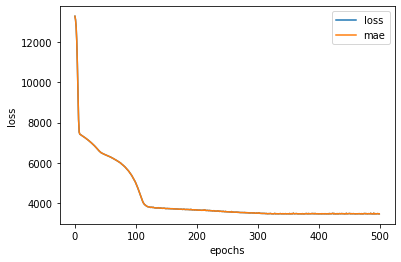

In [97]:
# Plot history (also known as a loss curve or a trainning curve )
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 **Question** How long should we train for ?

It depends on the problem we'are working on. However, many people have asked this question before, So Tensorflow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component we can add to our model to stop training once it stops improving a certain metric   

Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

To be sure which one to use, we could try both and see which performs better.



In [98]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


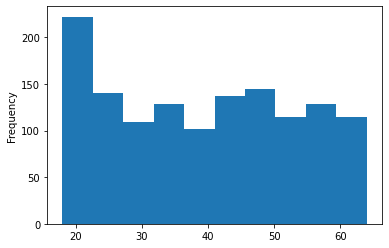

In [99]:
X["age"].plot(kind="hist")

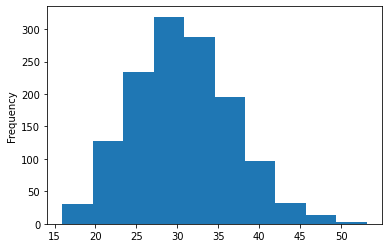

In [100]:
X["bmi"].plot(kind="hist")

In [101]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [103]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data we can borrow a few classes from Scikit-Learn

In [105]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [106]:

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]), # to turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)

# Create X & y
X= insurance.drop("charges", axis=1)
y= insurance["charges"]

# Build our train and test sets
X_train , X_test, y_train , y_test=train_test_split(X,y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [107]:
# What does our data looks like now ?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [109]:
X_train_normal[20]

array([0.26086957, 0.31436642, 0.2       , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [110]:
X_train_normal


array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [111]:
X_train_normal.shape,X_train.shape, 

((1070, 11), (1070, 6))

Beautiful! Our Data has been normallized and on hot encoded.Now let's build a neural Network model on it and see how it goes.

In [113]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [114]:
# Evaluate our insurance model trained on normalize data
insurance_model_4.evaluate(X_test_normal, y_test )

9/9 [==============================] - 0s 3ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]